# Abalone_Age_Prediction:-

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn

import warnings
warnings.filterwarnings('ignore')

# Importing the Dataset:-

In [2]:
abl=pd.read_csv('Abalone.csv')
abl

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings(Age)
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [3]:
abl.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings(Age)
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
abl.shape

(4177, 9)

In [5]:
abl.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings(Age)'],
      dtype='object')

# Data Cleaning:-

In [6]:
# Checking for the null values:-

abl.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings(Age)        0
dtype: int64

In [7]:
abl.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings(Age)          int64
dtype: object

In [ ]:
#The data types shows that Sex is "object" type, 
#Rings is of "int" type and 
#rest are "float" type.

In [8]:
abl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings(Age)      4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [3]:
abl=abl.rename({'Rings(Age)':'Age'},axis=1)

In [4]:
abl

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [30]:
abl.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


# EDA:-

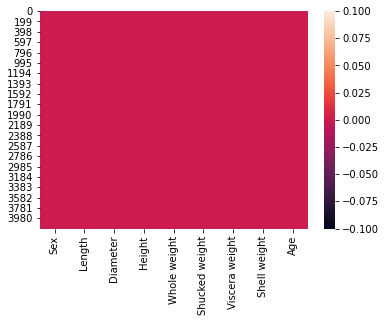

In [31]:
sns.heatmap(abl.isnull())
plt.show()

In [21]:
abl.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings(Age)'],
      dtype='object')

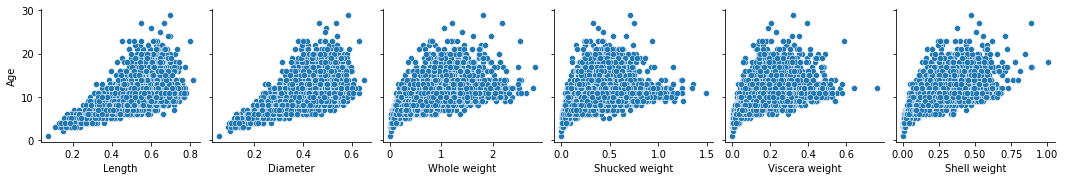

In [5]:
sns.pairplot(data=abl,x_vars=['Length','Diameter','Whole weight','Shucked weight',
                                 'Viscera weight','Shell weight'],
                         y_vars='Age')

plt.show()

In [ ]:
# Above pairplot shows that 'Length'
# and 'Diameter' have almost Linear 
# Relation with the 'Age' of abalone.

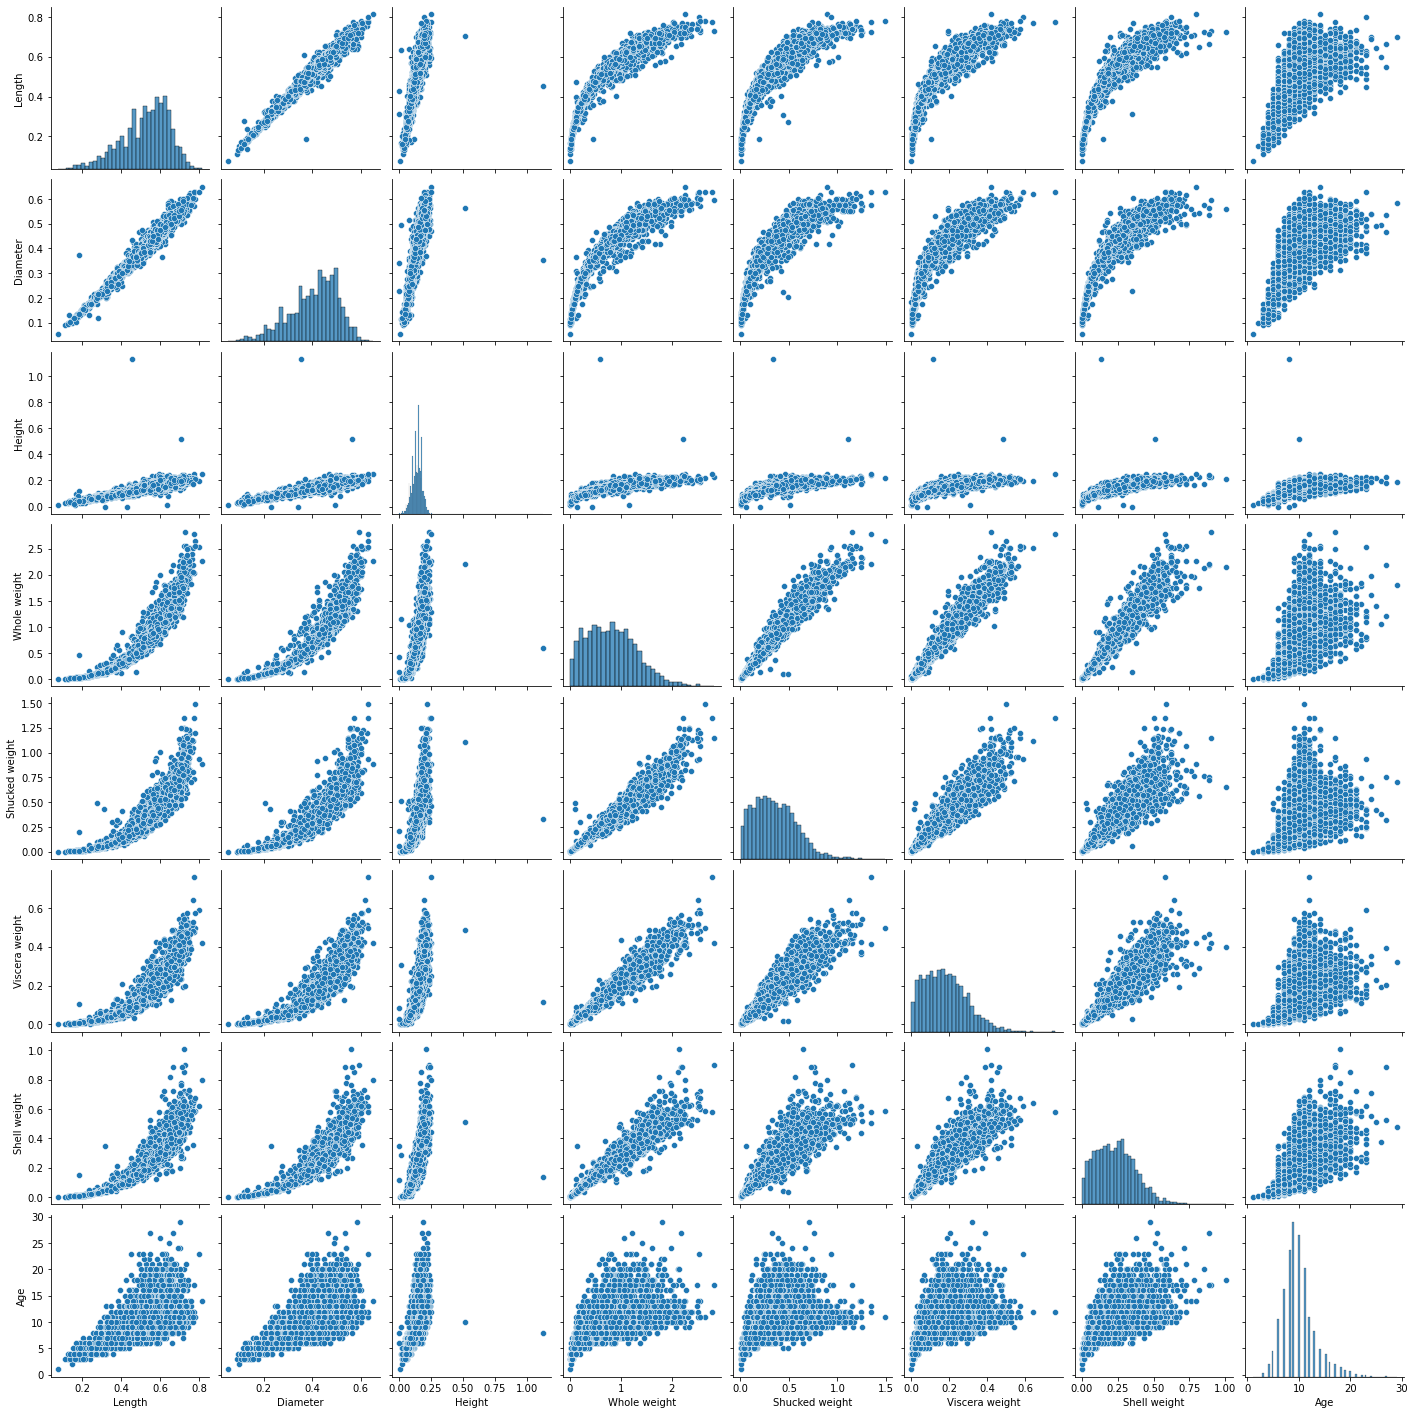

In [11]:
sns.pairplot(abl)
plt.show()

In [12]:
# Numerical Features of the dataset and make a deep copy:-

numerical_features=abl[['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Age']].copy()

In [13]:
numerical_features.columns

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Age'],
      dtype='object')

In [14]:
categorical_feature=abl['Sex']

# Correlation:-

In [15]:
# Checking the Correlation with respect to target variable(Age):-

numerical_features.corr()['Age'].sort_values()

Shucked weight    0.420884
Viscera weight    0.503819
Whole weight      0.540390
Length            0.556720
Height            0.557467
Diameter          0.574660
Shell weight      0.627574
Age               1.000000
Name: Age, dtype: float64

In [ ]:
# Above observation shows a good 
# correlation with the target variable in 
# which 'Whole weight',Length','Height',
# 'Diameter' and 'Shell weight'
# are highly correlated.

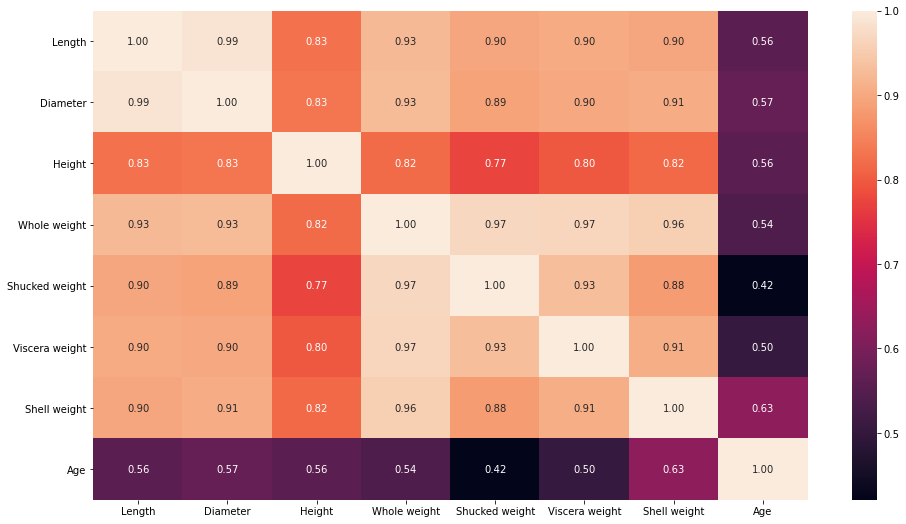

In [16]:
plt.figure(figsize=(16,9))
sns.heatmap(numerical_features.corr(),annot=True,fmt='0.2f')
plt.show()

In [ ]:
#Observations:-

#1. Whole weight is almost linearly varying with all other
#features except age.
#2. Age is most linearly proportional with Shell weight 
#followed by diameter and length.

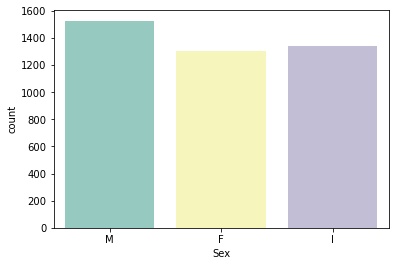

In [17]:
sns.countplot(x='Sex',data=abl,palette='Set3')
plt.show()

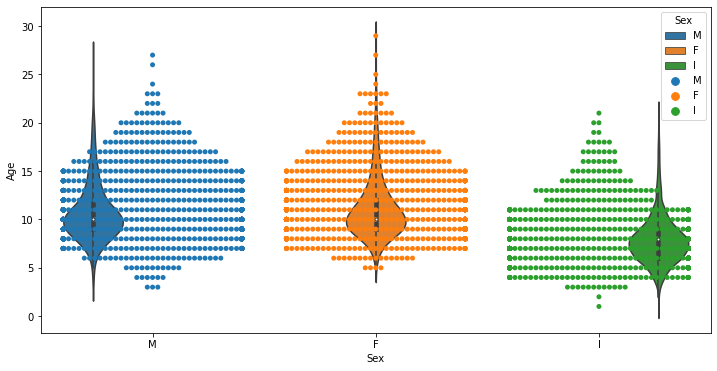

In [18]:
plt.figure(figsize=(12,6))
sns.swarmplot(x='Sex',y='Age',hue='Sex',data=abl)
sns.violinplot(x='Sex',y='Age',hue='Sex',data=abl)
plt.show()

In [ ]:
#Observations:-

#Male: age majority lies in between 7.5 years
#to 15 years.
#Female: age majority lies in between 8 years
#to 15 years. 
#Immature: age majority lies in between 5 years
#to <10 years.

In [19]:
# converting sex from object to integer type:-

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
abl['Sex']=le.fit_transform(abl['Sex'])

In [20]:
abl

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


# Checking for the Skewness:-

In [21]:
abl.skew()

Sex              -0.098155
Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Age               1.114102
dtype: float64

In [ ]:
#Above data shows that 'Height',
#'Shucked weight' and 'Viscera weight'
#are highly skewed.

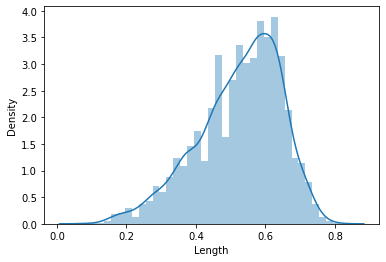

In [22]:
# checking with the distribution curve:-

sns.distplot(abl['Length'])
plt.show()

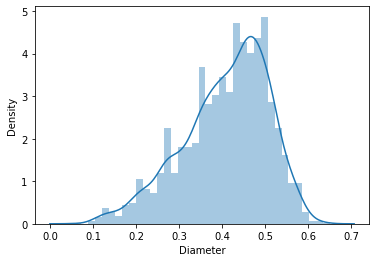

In [23]:
sns.distplot(abl['Diameter'])
plt.show()

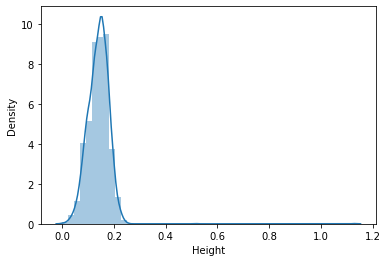

In [24]:
sns.distplot(abl['Height'])
plt.show()

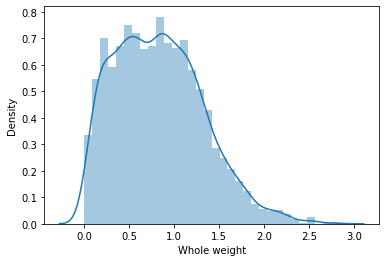

In [25]:
sns.distplot(abl['Whole weight'])
plt.show()

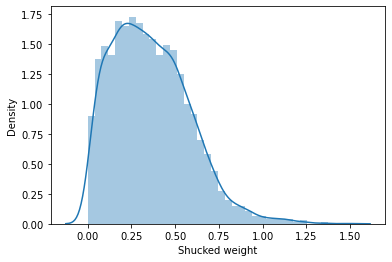

In [26]:
sns.distplot(abl['Shucked weight'])
plt.show()

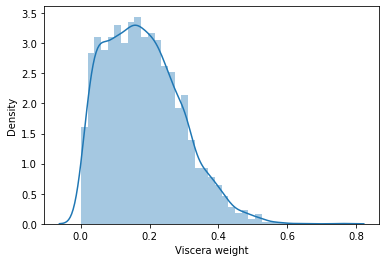

In [27]:
sns.distplot(abl['Viscera weight'])
plt.show()

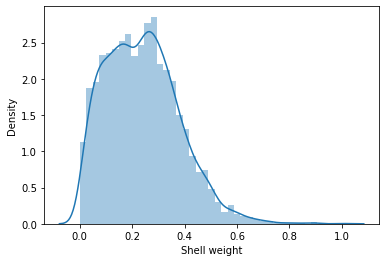

In [28]:
sns.distplot(abl['Shell weight'])
plt.show()

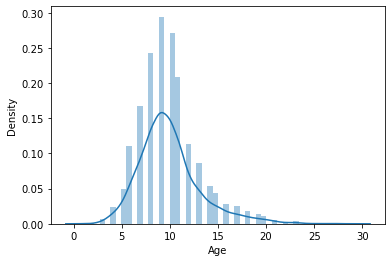

In [29]:
sns.distplot(abl['Age'])
plt.show()

In [ ]:
#Above visualizations shows that the is not normalized.
#The building blocks is out of normalized curve.

# Outliers Removal:-

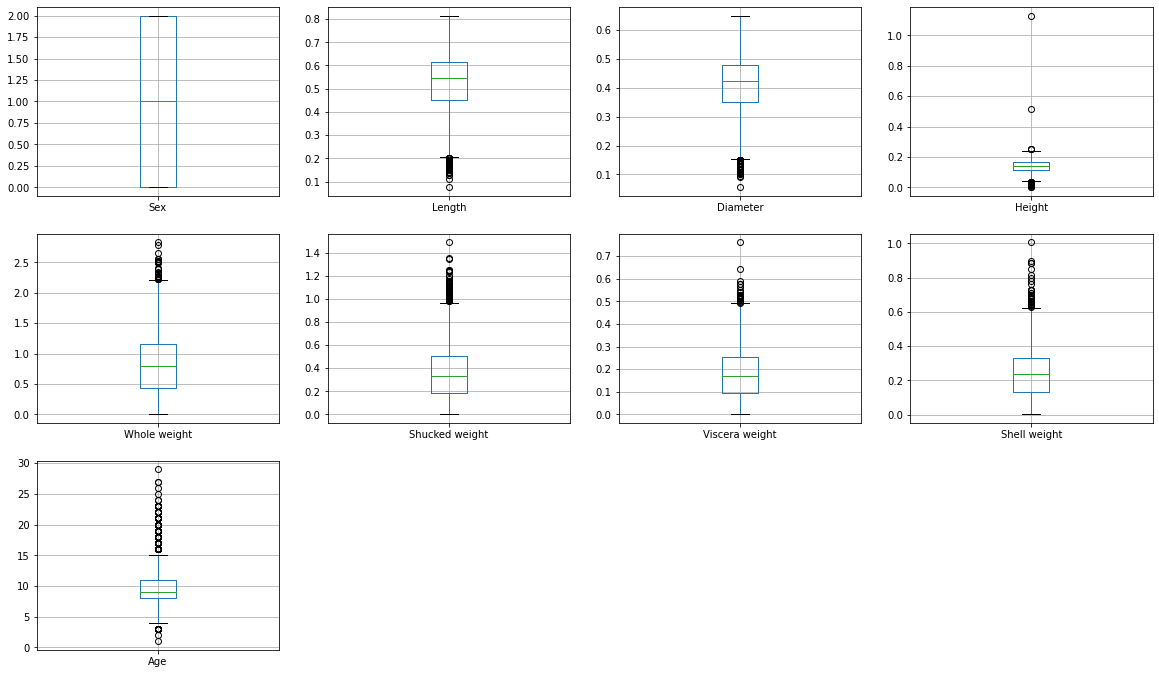

In [30]:
# checking the outliers with visualization:-

abl.plot(kind='box',subplots=True,layout=(4,4),figsize=(20,16),grid=True)
plt.show()

In [31]:
from scipy.stats import zscore
z=np.abs(zscore(abl))
z

array([[1.15198011, 0.57455813, 0.43214879, ..., 0.72621157, 0.63821689,
        1.57154357],
       [1.15198011, 1.44898585, 1.439929  , ..., 1.20522124, 1.21298732,
        0.91001299],
       [1.28068972, 0.05003309, 0.12213032, ..., 0.35668983, 0.20713907,
        0.28962385],
       ...,
       [1.15198011, 0.6329849 , 0.67640943, ..., 0.97541324, 0.49695471,
        0.28962385],
       [1.28068972, 0.84118198, 0.77718745, ..., 0.73362741, 0.41073914,
        0.02057072],
       [1.15198011, 1.54905203, 1.48263359, ..., 1.78744868, 1.84048058,
        0.64095986]])

In [32]:
# index no.

np.where(z>3)

(array([   6,   72,   81,   83,  129,  163,  164,  165,  165,  165,  166,
         166,  167,  168,  170,  181,  232,  236,  236,  236,  237,  237,
         238,  238,  239,  270,  275,  277,  278,  294,  310,  313,  314,
         334,  351,  355,  358,  358,  362,  375,  416,  417,  428,  431,
         433,  469,  478,  480,  501,  526,  526,  530,  572,  628,  673,
         674,  675,  678,  694,  696,  696,  719,  719,  720,  720,  744,
         754,  756,  811,  891,  891,  891, 1048, 1051, 1051, 1052, 1193,
        1197, 1199, 1202, 1204, 1206, 1206, 1207, 1207, 1207, 1207, 1209,
        1209, 1257, 1417, 1417, 1418, 1422, 1426, 1427, 1427, 1427, 1428,
        1429, 1429, 1528, 1754, 1756, 1757, 1759, 1761, 1762, 1762, 1762,
        1763, 1763, 1763, 1821, 1982, 1986, 1987, 1987, 2051, 2090, 2108,
        2108, 2114, 2114, 2157, 2161, 2176, 2180, 2199, 2201, 2208, 2209,
        2274, 2275, 2305, 2334, 2334, 2334, 2335, 2344, 2358, 2368, 2381,
        2436, 2459, 2471, 2544, 2623, 

In [33]:
abl_new=abl[(z<3).all(axis=1)]
abl_new

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [82]:
abl.shape

(4177, 9)

In [34]:
abl_new.shape

(4027, 9)

In [35]:
# percentage data loss:-

loss_percent=(4177-4027)/(4027*100)
print(loss_percent,'%')

0.00037248572138068043 %


In [36]:
# Transforming the data to remove skewness:-

import sklearn
from sklearn.preprocessing import power_transform
X=power_transform(abl,method='yeo-johnson')
X

array([[ 1.12707158, -0.68550213, -0.54986033, ..., -0.69328289,
        -0.587809  ,  1.48235844],
       [ 1.12707158, -1.39634403, -1.38733299, ..., -1.33295268,
        -1.33241968, -0.94913462],
       [-1.30793479, -0.07077438,  0.00853714, ..., -0.25513514,
        -0.09826193, -0.17607507],
       ...,
       [ 1.12707158,  0.59336612,  0.64519089, ...,  1.01560749,
         0.59839786, -0.17607507],
       [-1.30793479,  0.85337516,  0.76992788, ...,  0.81518436,
         0.51914542,  0.15690844],
       [ 1.12707158,  1.83447784,  1.72628889, ...,  1.61134422,
         1.65848824,  0.74460653]])

In [86]:
X.ndim

2

In [37]:
X.std()

1.0

In [38]:
x=abl_new.drop(['Age'],axis=1)
x

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [39]:
y=abl_new['Age']
y

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Age, Length: 4027, dtype: int64

# Machine Learning Algorithms Training and Testing Process:-

In [40]:
# linear Regression;

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    train_accuracy=r2_score(y_train,pred_train)
    test_accuracy=r2_score(y_test,pred_test)
    print("At random state",{i},train_accuracy)
    print("At random state",{i},test_accuracy)
    print("\n")

At random state {0} 0.5206408573653768
At random state {0} 0.48490897537919964


At random state {1} 0.5178458978075204
At random state {1} 0.4941036312407546


At random state {2} 0.518041964626347
At random state {2} 0.4974748011478475


At random state {3} 0.5145548976919276
At random state {3} 0.5095783117293221


At random state {4} 0.5118792991948198
At random state {4} 0.5208948319239937


At random state {5} 0.5199563967536596
At random state {5} 0.48853505000848985


At random state {6} 0.5108171318060508
At random state {6} 0.5242230264579847


At random state {7} 0.5215575149941301
At random state {7} 0.48086376911415496


At random state {8} 0.5111921018943448
At random state {8} 0.523700939635845


At random state {9} 0.5100992562488225
At random state {9} 0.5278383059802854


At random state {10} 0.5082110742561323
At random state {10} 0.5335295197658709


At random state {11} 0.5061088501569664
At random state {11} 0.5457352413416736


At random state {12} 0.507901378508

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=99)

In [42]:
s=mean_squared_error(y_train,pred_train)
print("Mean squared error of training set :%2f"%s)
p=mean_squared_error(y_test,pred_test)
print("Mean squared error of testing set :%2f"%p)

Mean squared error of training set :4.001801
Mean squared error of testing set :3.945741


In [43]:
# Support Vector Regression:-

from sklearn.svm import SVR
 
svr=SVR(kernel='linear')
svr.fit(x_train,y_train)
svr.fit(x_test,y_test)

SVR(kernel='linear')

In [44]:
train_pred=svr.predict(x_train)
test_pred=svr.predict(x_test)

svr.score(x_train,y_train)

0.4088294049577009

In [45]:
svr.score(x_test,y_test)

0.41694028834059027

In [46]:
# Cross Validation:-

train_accuracy=r2_score(y_train,pred_train)
test_accuracy=r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=j)
    cv_mean=cv_score.mean()
    
    print(j,cv_score,cv_mean,train_accuracy,test_accuracy)
    print("\n")

2 [0.50178293 0.51652101] 0.5091519690309692 0.5107522061674028 0.5248279585595752


3 [0.51297023 0.49187695 0.48247274] 0.495773308280995 0.5107522061674028 0.5248279585595752


4 [0.47780099 0.17183099 0.53723602 0.49672921] 0.4208993024070198 0.5107522061674028 0.5248279585595752


5 [0.39223862 0.21391524 0.49735705 0.49887296 0.47162632] 0.4148020401486134 0.5107522061674028 0.5248279585595752


6 [0.39829641 0.47858034 0.18951251 0.55265251 0.48816666 0.45240372] 0.4266020242275068 0.5107522061674028 0.5248279585595752


7 [0.44178747 0.50076557 0.15176169 0.5317911  0.47822384 0.50023064
 0.45360001] 0.4368800445969128 0.5107522061674028 0.5248279585595752


8 [0.51618104 0.46023267 0.23926127 0.15247141 0.53205457 0.33139517
 0.50706384 0.44695602] 0.3982019996299326 0.5107522061674028 0.5248279585595752


9 [0.51242254 0.45921737 0.24939048 0.10536325 0.57734285 0.50246708
 0.49928803 0.47023926 0.47525152] 0.4278869319401447 0.5107522061674028 0.5248279585595752




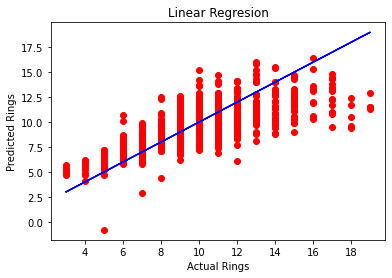

In [48]:
# Linear Regression Graph:-

plt.scatter(x=y_test,y=pred_test,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Rings')
plt.ylabel('Predicted Rings')
plt.title('Linear Regresion')
plt.show()

# Hyperparameter Tuning:-

In [49]:
# Regularization;

from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [50]:
parameters={'alpha':[0.0001,0.001,0.01,0.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf= GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [51]:
# final model training;

ls=Lasso(alpha=0.0001,random_state=0)
ls.fit(x_train,y_train)
ls_score_training=ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)
ls_score_training*100

51.07292473817283

In [52]:
# Ensemble technique:-

from sklearn.ensemble import RandomForestRegressor
parameters={'criterion':['mse','mae'],'max_features':['auto','sqrt','log2']}
rf= RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'log2'}


In [53]:
rf=RandomForestRegressor(criterion='mse',max_features='log2')
rf.fit(x_train,y_train)
train_r2=rf.score(x_train,y_train)
pred_decision=rf.predict(x_test)
print(train_r2)
rf2=r2_score(y_test,pred_decision)
print('R2_Score',rf2)
rfs=cross_val_score(rf,x,y,cv=5)
rfc=rf.score(x_train,y_train)
print('Cross_Val_Score',rfc*100)

0.934476700807992
R2_Score 0.5727737881681141
Cross_Val_Score 93.4476700807992


In [ ]:
# So, we are getting our model accuracy 93.5% and 
# moderate R2_score 0.58 which shows that 
# our model is performing 
# "good enough".

# Saving the Model:-

In [54]:
import pickle
filename='Abalone_Rings.pkl'
pickle.dump(rf,open(filename,'wb'))

# Conclusion:-

In [55]:
loaded_model=pickle.load(open('Abalone_Rings.pkl','rb'))

In [56]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred_decision[:]],
                        index=['Predicted','Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,796,797,798,799,800,801,802,803,804,805
Predicted,8.7,7.18,10.31,8.15,10.48,10.8,7.92,11.38,10.14,6.11,...,7.27,6.32,12.61,9.14,11.3,6.92,8.14,10.45,6.89,10.55
Original,8.7,7.18,10.31,8.15,10.48,10.8,7.92,11.38,10.14,6.11,...,7.27,6.32,12.61,9.14,11.3,6.92,8.14,10.45,6.89,10.55


In [57]:
conclusion.transpose()

,Predicted,Original
0,8.70,8.70
1,7.18,7.18
2,10.31,10.31
3,8.15,8.15
4,10.48,10.48
...,...,...
801,6.92,6.92
802,8.14,8.14
803,10.45,10.45
804,6.89,6.89
